In [28]:
R = 1.1

def calc_p(t):
    return R**t

def calc_liq(p, x, y):
    return p * x + y

def calc_x(p, l, y):
    return (l - y) / p

def calc_y(p, l, x):
    return l - p * x

def calc_dy(p, x, y, dx):
    # p * (x + dx) + (y - dy) = p * x + y
    # p * dx - dy = 0
    return p * dx

def calc_dx(p, x, y, dy):
    # p * (x - dx) + (y + dy) = p * x + y
    # p * (-dx) + dy = 0
    return dy / p

def geo_sum(r, n):
    return (r**(n+1) - 1) / (r - 1)

# k <= i <= k + n
# s = (R**(n + 1) - 1) / (R - 1)
# x = x_k * s
# Find x such that uniform liquidity L is provided to k to k + n
# L = p_x_k * x_k
# n * L = sum(p_i * x_i)
# x_k = L / p_x_k
# x = x_k * s
def calc_x_k(x, n):
    s = geo_sum(R, n)
    return x / s

def calc_x_i(x_k, i):
    # 0 <= i
    return x_k / R**i

def sum_y(t_lo, t_hi, liq):
    assert t_lo <= t_hi
    return liq * (t_hi - t_lo + 1)

# x = x_k + x_(k+1) + ... + x_(k+n)
# L_k = p_k * x_k
# (n + 1) * L_k = sum(p_(k+i) * x_(k+i)), 0 <= i <= n
# x_(k+i) = 1/R**i * x_k
def sum_x(t_lo, t_hi, liq):
    assert t_lo <= t_hi
    n = t_hi - t_lo
    s = geo_sum(1/R, n)
    p_k = calc_p(t_lo)
    x_k = liq / p_k
    return x_k * s

def calc_lyi(t_lo, t_hi, y):
    assert t_lo <= t_hi
    return y / (t_hi - t_lo + 1)

def calc_lxi(t_lo, t_hi, x):
    n = t_hi - t_lo
    s = geo_sum(1/R, n)
    x_k = x / s
    p_k = calc_p(t_lo)
    return p_k * x_k

In [32]:
print("ly", calc_lyi(-10, -1, 100))
print("lx", calc_lxi(1, 10, sum_x(1, 10, 10)))

print("y", sum_y(-10, -1, 10))
print("x", sum_x(1, 10, 10))

ly 10.0
lx 10.0
y 100
x 61.44567105704681


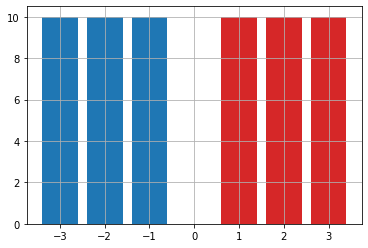

30.0 24.86851990984222 24.868519909842224
30.0 30


In [2]:
import math
import random
import matplotlib.pyplot as plt

N = 3
# x_k = calc_x_k(x, N)
L = 10
x_k = L / calc_p(1)
s = geo_sum(R, N - 1)
x = x_k * s

x_ticks = [i + 1 for i in range(N)]
y_ticks = [-(i + 1) for i in range(N)]
x_liqs = [calc_liq(calc_p(t), x, 0) for (t, x) in zip(x_ticks, [x_k, x_k / R, x_k / R**2])]
y_liqs = [calc_liq(calc_p(t), 0, y) for (t, y) in zip(y_ticks, [L, L, L])]

plt.bar(x_ticks, x_liqs, color = "tab:red")
plt.bar(y_ticks, y_liqs, color = "tab:blue")
plt.grid()
plt.show()

# TODO: fix - sum x != sum_x
print(sum(x_liqs), sum([x_k, x_k / R, x_k / R**2]), sum_x(1, 3, 10))
print(sum(y_liqs), sum_y(-3, -1, 10))